# IPL Auction 2022 Data Analysis

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing and reading data

In [2]:
df = pd.read_csv("ipl_2022_dataset.csv")
df

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...,...
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


#### Cleaning Data

In [3]:
## Removing "Unnamed: 0" column
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [4]:
## Check all the null values
df.isna().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [5]:
## Null values of cost in CR. and is $
df[(df["COST IN ₹ (CR.)"].isnull()) & (df["Cost IN $ (000)"].isnull())]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [6]:
## Filling null values of the cost with 0
df["COST IN ₹ (CR.)"] = df["COST IN ₹ (CR.)"].fillna(0)
df["Cost IN $ (000)"] = df["Cost IN $ (000)"].fillna(0)

In [7]:
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [8]:
## Null values in 2021 squad
df[df["2021 Squad"].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [9]:
# Fill null value of 2021 squad with "Not Participated"
df["2021 Squad"] = df["2021 Squad"].fillna("Not Participated")

In [10]:
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold


In [11]:
## Adding a new column 'status' to know whether the player is sold or unsold
teams = df[df["COST IN ₹ (CR.)"] > 0]["Team"].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [12]:
df["Status"] = df["Team"].replace(teams, "sold")
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [13]:
## Adding a retention which tells whether the player is retained, is in auction or draft pick
df["Base Price"].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [14]:
df['Retention'] = df['Base Price']
df["Retention"].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', '1.5 Cr'], 'In Auction', inplace=True)

In [15]:
df["Base Price"].replace(['Draft Pick', 'Retained'], 0, inplace=True)
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction


In [16]:
## Converting "Base Price in Lakhs"
df["Base Price"].unique()

array([0, '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh', '50 Lakh',
       '30 Lakh', '1.5 Cr'], dtype=object)

In [17]:
df["Base Price"].replace({'2 Cr':200, '40 Lakh':40, '20 Lakh':20, '1 Cr':100, '75 Lakh':75, '50 Lakh':50, '30 Lakh':30, '1.5 Cr':150}, inplace=True)

In [18]:
df["Base Price"] = df["Base Price"].astype(float)
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention
0,Rashid Khan,0.0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,0.0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,200.0,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40.0,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,0.0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20.0,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
629,Monu Singh,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
630,Nivethan Radhakrishnan,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
631,Lance Morris,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction


In [19]:
df.rename(columns={'Base Price': 'Base Price (in Lakhs)'}, inplace=True)
df

,Player,Base Price (in Lakhs),TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention
0,Rashid Khan,0.0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,0.0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,200.0,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40.0,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,0.0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20.0,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
629,Monu Singh,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
630,Nivethan Radhakrishnan,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
631,Lance Morris,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction


In [20]:
## Renaming columns to appropriate names
df.rename(columns={'TYPE':'Type', 'COST IN ₹ (CR.)': 'Sold_value (in CR)', '2021 Squad': 'Prev_Team', 'Team':'Curr_Team'}, inplace=True)
df

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Cost IN $ (000),Prev_Team,Curr_Team,Status,Retention
0,Rashid Khan,0.0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,0.0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,200.0,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40.0,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,0.0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20.0,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
629,Monu Singh,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
630,Nivethan Radhakrishnan,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction
631,Lance Morris,20.0,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,In Auction


In [21]:
## Dropping "Cost IN $ (000)" in column
df.drop('Cost IN $ (000)', axis=1, inplace=True)
df

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
0,Rashid Khan,0.0,BOWLER,15.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,0.0,ALL-ROUNDER,15.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,200.0,BOWLER,10.0,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40.0,ALL-ROUNDER,9.0,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,0.0,BATTER,8.0,KKR,Gujarat Titans,sold,Draft Pick
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20.0,BATTER,0.0,Not Participated,Unsold,Unsold,In Auction
629,Monu Singh,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction
630,Nivethan Radhakrishnan,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction
631,Lance Morris,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction


## Data is now ready to be analyzed

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 633 non-null    object 
 1   Base Price (in Lakhs)  633 non-null    float64
 2   Type                   633 non-null    object 
 3   Sold_value (in CR)     633 non-null    float64
 4   Prev_Team              633 non-null    object 
 5   Curr_Team              633 non-null    object 
 6   Status                 633 non-null    object 
 7   Retention              633 non-null    object 
dtypes: float64(2), object(6)
memory usage: 39.7+ KB


In [23]:
df.describe()

,Base Price (in Lakhs),Sold_value (in CR)
count,633.000000,633.000000
mean,48.720379,1.383728
std,52.995902,3.148242
min,0.000000,0.000000
25%,20.000000,0.000000
50%,20.000000,0.000000
75%,50.000000,0.550000
max,200.000000,17.000000


In [24]:
df.shape

(633, 8)

In [25]:
df.head(7)

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
0,Rashid Khan,0.0,BOWLER,15.00,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,0.0,ALL-ROUNDER,15.00,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,200.0,BOWLER,10.00,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40.0,ALL-ROUNDER,9.00,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,0.0,BATTER,8.00,KKR,Gujarat Titans,sold,Draft Pick
5,Mohammad Shami,200.0,BOWLER,6.25,PBKS,Gujarat Titans,sold,In Auction
6,Yash Dayal,20.0,BOWLER,3.20,Not Participated,Gujarat Titans,sold,In Auction


In [26]:
df.tail(7)

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
626,Hardik Tamore,20.0,WICKETKEEPER,0.0,Not Participated,Unsold,Unsold,In Auction
627,Mihir Hirwani,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction
628,Sairaj Patil,20.0,BATTER,0.0,Not Participated,Unsold,Unsold,In Auction
629,Monu Singh,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction
630,Nivethan Radhakrishnan,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction
631,Lance Morris,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction
632,Aaron Hardie,20.0,ALL-ROUNDER,0.0,Not Participated,Unsold,Unsold,In Auction


#### Number of bowlers, batsmen, allrounders and wicketkeepers

In [27]:
types = df['Type'].value_counts()
types.reset_index()

,index,Type
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


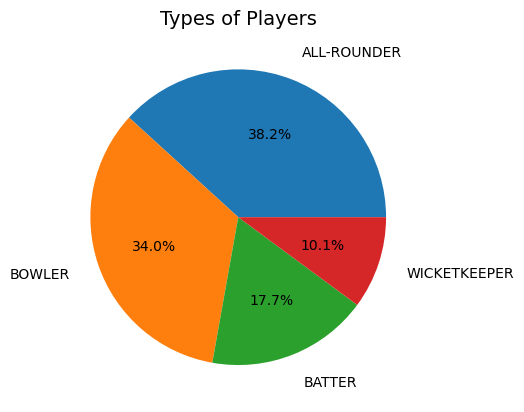

In [28]:
## Piechart for types of players
plt.pie(types.values, labels=types.index, labeldistance=1.2, autopct='%1.1f%%')
plt.title("Types of Players", fontsize=14, fontweight = 'light')
plt.plot();

#### Retained players from specific teams

In [29]:
retained = df[df["Retention"] == 'Retained']['Curr_Team'].value_counts()
retained_df = pd.DataFrame(retained)
retained_df = retained_df.rename(columns={"Curr_Team": "Number of Players Retained"})
retained_df

,Number of Players Retained
Chennai Super Kings,4
Delhi Capitals,4
Kolkata Knight Riders,4
Mumbai Indians,4
Royal Challengers Bangalore,3
Rajasthan Royals,3
Sunrisers Hyderabad,3
Punjab Kings,2


In [30]:
## Verifying by data of a single team
df[(df["Curr_Team"] == "Chennai Super Kings") & (df["Retention"] == "Retained")]

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
22,Ravindra Jadeja,0.0,ALL-ROUNDER,16.0,CSK,Chennai Super Kings,sold,Retained
24,MS Dhoni,0.0,WICKETKEEPER,12.0,CSK,Chennai Super Kings,sold,Retained
25,Moeen Ali,0.0,ALL-ROUNDER,8.0,CSK,Chennai Super Kings,sold,Retained
27,Ruturaj Gaikwad,0.0,BATTER,6.0,CSK,Chennai Super Kings,sold,Retained


#### Total sold and unsold players

In [31]:
df["Status"].value_counts()

Unsold    396
sold      237
Name: Status, dtype: int64

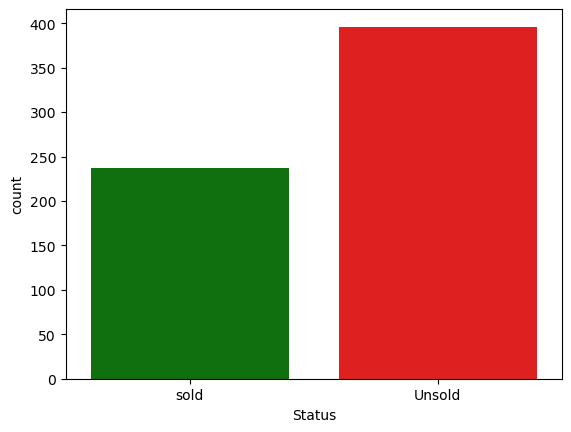

In [32]:
sns.countplot(data=df, x="Status", palette=['Green', 'Red']);

#### Players bought by each team

In [33]:
players_bought = df[df["Curr_Team"] != 'Unsold']["Curr_Team"].value_counts()
df_players_bought = pd.DataFrame(players_bought)
df_players_bought = df_players_bought.rename(columns={'Curr_Team': 'Players bought'})
df_players_bought

,Players bought
Chennai Super Kings,25
Kolkata Knight Riders,25
Punjab Kings,25
Mumbai Indians,25
Delhi Capitals,24
Rajasthan Royals,24
Sunrisers Hyderabad,23
Gujarat Titans,22
Lucknow Super Giants,22
Royal Challengers Bangalore,22


#### Most expensive bowler, batsman, allrounder and wicketkeeper

In [34]:
df["Sold_value (in CR)"].unique().max()

17.0

In [35]:
top_wicketkeeper = df[(df["Retention"] == "In Auction") & (df["Type"] == "WICKETKEEPER")].sort_values(by="Sold_value (in CR)", ascending=False).head(1)
top_wicketkeeper

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
144,Ishan Kishan,200.0,WICKETKEEPER,15.25,MI,Mumbai Indians,sold,In Auction


In [36]:
top_batsman = df[(df["Retention"] == "In Auction") & (df["Type"] == "BATTER")].sort_values(by="Sold_value (in CR)", ascending=False).head(1)
top_batsman

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
71,Shreyas Iyer,200.0,BATTER,12.25,DC,Kolkata Knight Riders,sold,In Auction


In [37]:
top_bowler = df[(df["Retention"] == "In Auction") & (df["Type"] == "BOWLER")].sort_values(by="Sold_value (in CR)", ascending=False).head(1)
top_bowler

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
23,Deepak Chahar,200.0,BOWLER,14.0,CSK,Chennai Super Kings,sold,In Auction


In [38]:
top_allrounder = df[(df["Retention"] == "In Auction") & (df["Type"] == "ALL-ROUNDER")].sort_values(by="Sold_value (in CR)", ascending=False).head(1)
top_allrounder

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
97,Liam Livingstone,100.0,ALL-ROUNDER,11.5,RR,Punjab Kings,sold,In Auction


In [39]:
top_df = pd.concat([top_bowler, top_allrounder, top_batsman, top_wicketkeeper])
top_df

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
23,Deepak Chahar,200.0,BOWLER,14.00,CSK,Chennai Super Kings,sold,In Auction
97,Liam Livingstone,100.0,ALL-ROUNDER,11.50,RR,Punjab Kings,sold,In Auction
71,Shreyas Iyer,200.0,BATTER,12.25,DC,Kolkata Knight Riders,sold,In Auction
144,Ishan Kishan,200.0,WICKETKEEPER,15.25,MI,Mumbai Indians,sold,In Auction


In [40]:
df

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team,Curr_Team,Status,Retention
0,Rashid Khan,0.0,BOWLER,15.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,0.0,ALL-ROUNDER,15.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,200.0,BOWLER,10.0,KKR,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40.0,ALL-ROUNDER,9.0,RR,Gujarat Titans,sold,In Auction
4,Shubman Gill,0.0,BATTER,8.0,KKR,Gujarat Titans,sold,Draft Pick
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20.0,BATTER,0.0,Not Participated,Unsold,Unsold,In Auction
629,Monu Singh,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction
630,Nivethan Radhakrishnan,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction
631,Lance Morris,20.0,BOWLER,0.0,Not Participated,Unsold,Unsold,In Auction


In [41]:
df = df.rename(columns={'Prev_Team': 'Prev_Team(2021)'})

#### Players who will be playing in same team in 2022

In [43]:
df["Prev_Team(2021)"].unique(), df["Curr_Team"].unique()

(array(['SRH', 'MI', 'KKR', 'RR', 'PBKS', 'Not Participated', 'CSK', 'DC',
        'RCB'], dtype=object),
 array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
        'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
        'Mumbai Indians', 'Royal Challengers Bangalore',
        'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object))

In [49]:
df.replace({"SRH":"Sunrisers Hyderabad", "MI":"Mumbai Indians", "KKR":"Kolkata Knight Riders", "RR":"Rajasthan Royals",
            "PBKS":"Punjab Kings", "CSK":"Chennai Super Kings", "DC":"Delhi Capitals", "RCB":"Royal Challengers Bangalore"}, inplace=True)

In [50]:
## Finding players with same team
same_team = df[(df["Curr_Team"] == df["Prev_Team(2021)"]) & (df["Retention"] == "In Auction")]
same_team

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team(2021),Curr_Team,Status,Retention
23,Deepak Chahar,200.0,BOWLER,14.00,Chennai Super Kings,Chennai Super Kings,sold,In Auction
26,Ambati Rayudu,200.0,WICKETKEEPER,6.75,Chennai Super Kings,Chennai Super Kings,sold,In Auction
28,Dwayne Bravo,200.0,ALL-ROUNDER,4.40,Chennai Super Kings,Chennai Super Kings,sold,In Auction
31,Robin Uthappa,200.0,BATTER,2.00,Chennai Super Kings,Chennai Super Kings,sold,In Auction
32,Mitchell Santner,100.0,ALL-ROUNDER,1.90,Chennai Super Kings,Chennai Super Kings,sold,In Auction
39,K.Bhagath Varma,20.0,ALL-ROUNDER,0.20,Chennai Super Kings,Chennai Super Kings,sold,In Auction
41,N. Jagadeesan,20.0,WICKETKEEPER,0.20,Chennai Super Kings,Chennai Super Kings,sold,In Auction
42,C.Hari Nishaanth,20.0,BATTER,0.20,Chennai Super Kings,Chennai Super Kings,sold,In Auction
43,K.M. Asif,20.0,BOWLER,0.20,Chennai Super Kings,Chennai Super Kings,sold,In Auction
62,Lalit Yadav,20.0,ALL-ROUNDER,0.65,Delhi Capitals,Delhi Capitals,sold,In Auction


In [51]:
same_team[same_team["Curr_Team"] == "Chennai Super Kings"]

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team(2021),Curr_Team,Status,Retention
23,Deepak Chahar,200.0,BOWLER,14.00,Chennai Super Kings,Chennai Super Kings,sold,In Auction
26,Ambati Rayudu,200.0,WICKETKEEPER,6.75,Chennai Super Kings,Chennai Super Kings,sold,In Auction
28,Dwayne Bravo,200.0,ALL-ROUNDER,4.40,Chennai Super Kings,Chennai Super Kings,sold,In Auction
31,Robin Uthappa,200.0,BATTER,2.00,Chennai Super Kings,Chennai Super Kings,sold,In Auction
32,Mitchell Santner,100.0,ALL-ROUNDER,1.90,Chennai Super Kings,Chennai Super Kings,sold,In Auction
39,K.Bhagath Varma,20.0,ALL-ROUNDER,0.20,Chennai Super Kings,Chennai Super Kings,sold,In Auction
41,N. Jagadeesan,20.0,WICKETKEEPER,0.20,Chennai Super Kings,Chennai Super Kings,sold,In Auction
42,C.Hari Nishaanth,20.0,BATTER,0.20,Chennai Super Kings,Chennai Super Kings,sold,In Auction
43,K.M. Asif,20.0,BOWLER,0.20,Chennai Super Kings,Chennai Super Kings,sold,In Auction


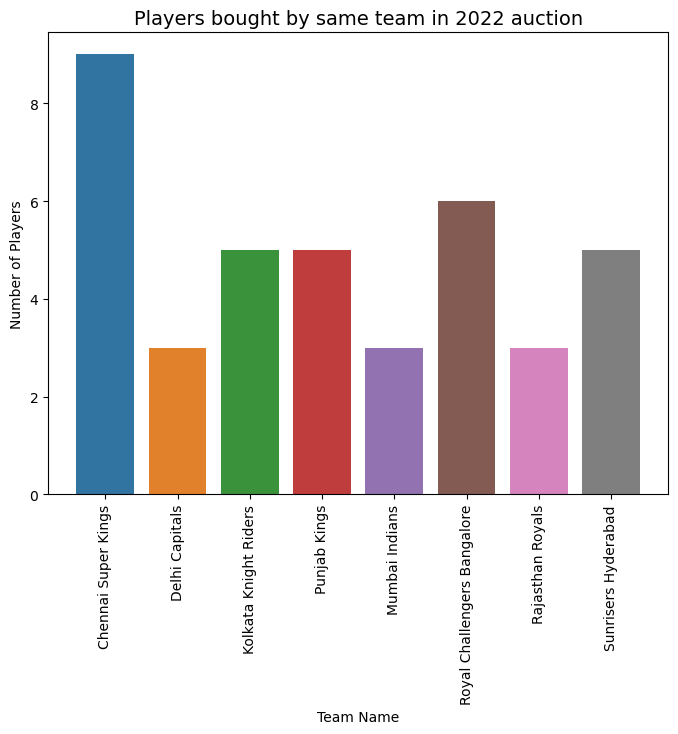

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(same_team, x="Curr_Team")
plt.xlabel("Team Name")
plt.ylabel("Number of Players")
plt.xticks(rotation = 90)
plt.title("Players bought by same team in 2022 auction", fontsize=14, fontweight='light')
plt.plot();

#### Number of players in each team based on their roles

In [77]:
roles = df[df["Curr_Team"] != "Unsold"]
roles

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team(2021),Curr_Team,Status,Retention
0,Rashid Khan,0.0,BOWLER,15.0,Sunrisers Hyderabad,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,0.0,ALL-ROUNDER,15.0,Mumbai Indians,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,200.0,BOWLER,10.0,Kolkata Knight Riders,Gujarat Titans,sold,In Auction
3,Rahul Tewatia,40.0,ALL-ROUNDER,9.0,Rajasthan Royals,Gujarat Titans,sold,In Auction
4,Shubman Gill,0.0,BATTER,8.0,Kolkata Knight Riders,Gujarat Titans,sold,Draft Pick
...,...,...,...,...,...,...,...,...
232,Priyam Garg,20.0,BATTER,0.2,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction
233,R Samarth,20.0,BATTER,0.2,Not Participated,Sunrisers Hyderabad,sold,In Auction
234,Jagadeesha Suchith,20.0,BOWLER,0.2,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,In Auction
235,Shashank Singh,20.0,ALL-ROUNDER,0.2,Not Participated,Sunrisers Hyderabad,sold,In Auction


[]

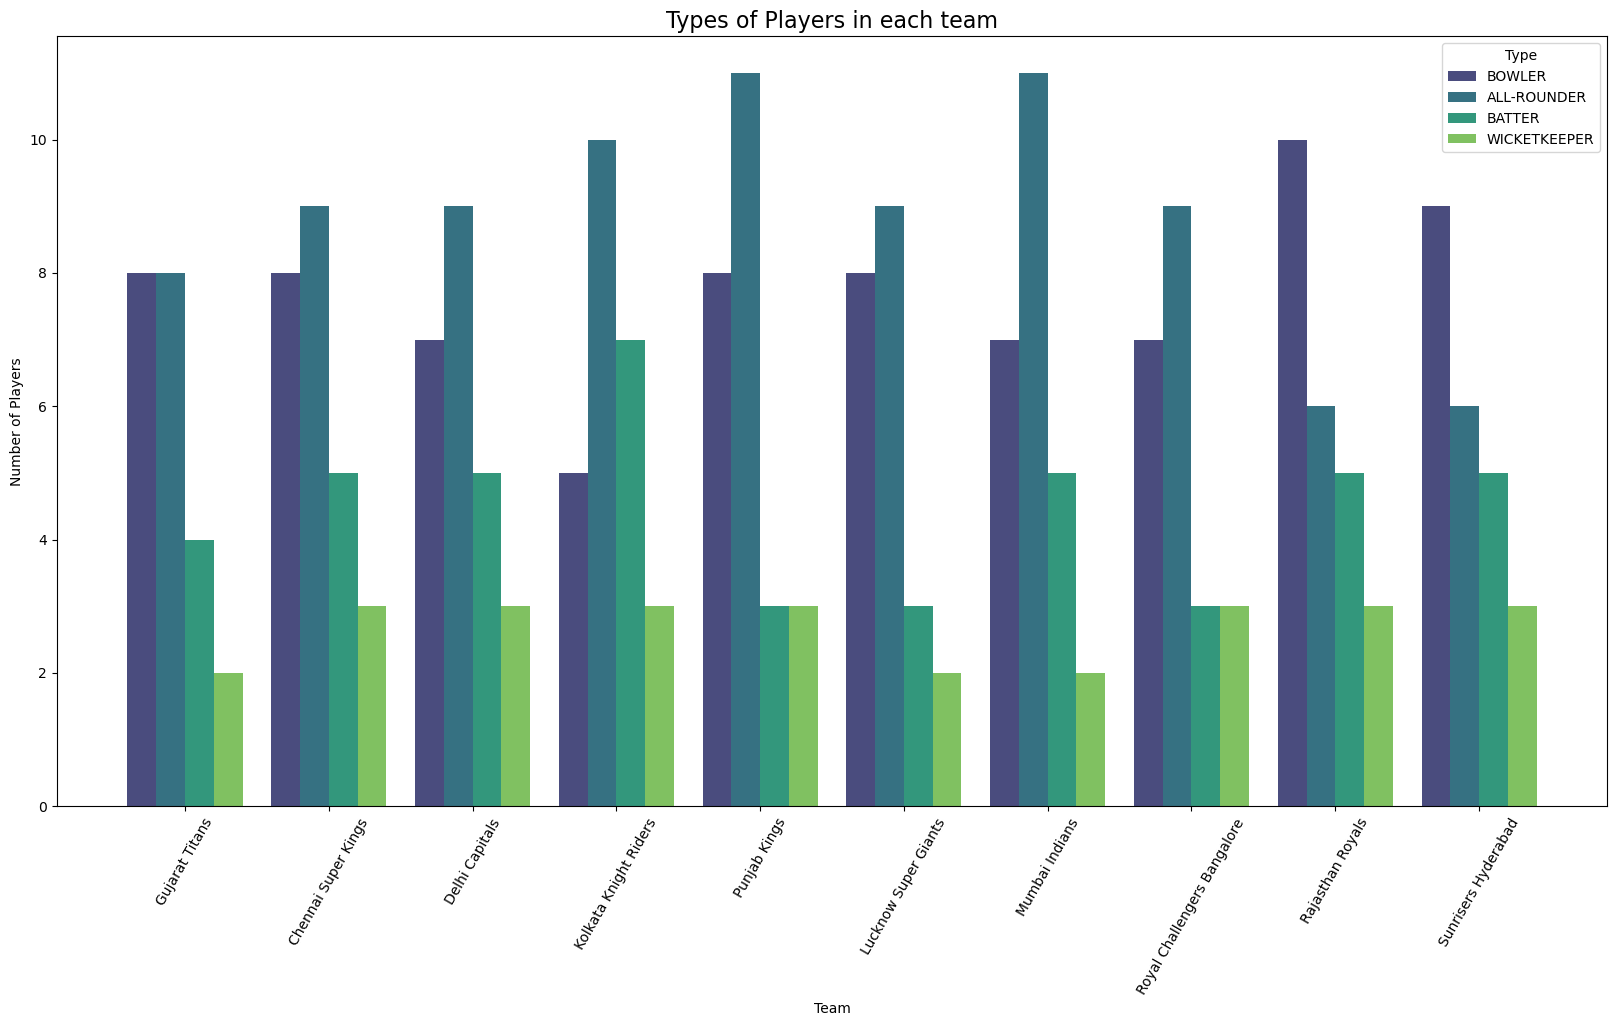

In [88]:
plt.figure(figsize=(20, 10))
sns.countplot(roles, x="Curr_Team", hue=df["Type"], palette="viridis")
plt.xlabel("Team")
plt.ylabel("Number of Players")
plt.title("Types of Players in each team", fontsize=16, fontweight="light")
plt.xticks(rotation = 60)
plt.plot()

#### Top 5 batsmen picked from auction

In [89]:
df[(df["Retention"] == "In Auction") & (df["Type"] == "BATTER")].sort_values(by="Sold_value (in CR)", ascending=False).head(5)

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team(2021),Curr_Team,Status,Retention
71,Shreyas Iyer,200.0,BATTER,12.25,Delhi Capitals,Kolkata Knight Riders,sold,In Auction
193,Shimron Hetmyer,150.0,BATTER,8.50,Delhi Capitals,Rajasthan Royals,sold,In Auction
217,Rahul Tripathi,40.0,BATTER,8.50,Kolkata Knight Riders,Sunrisers Hyderabad,sold,In Auction
100,Shikhar Dhawan,200.0,BATTER,8.25,Delhi Capitals,Punjab Kings,sold,In Auction
195,Devdutt Padikkal,200.0,BATTER,7.75,Royal Challengers Bangalore,Rajasthan Royals,sold,In Auction


#### Highest paid retained player

In [90]:
df[df["Retention"] == "Retained"].sort_values(by="Sold_value (in CR)", ascending=False).head(1)

,Player,Base Price (in Lakhs),Type,Sold_value (in CR),Prev_Team(2021),Curr_Team,Status,Retention
22,Ravindra Jadeja,0.0,ALL-ROUNDER,16.0,Chennai Super Kings,Chennai Super Kings,sold,Retained


### Players who played in 2021 but went unsold in 2022

In [91]:
df["Prev_Team(2021)"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Punjab Kings', 'Not Participated',
       'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore'], dtype=object)

In [94]:
unsold = df[(df["Prev_Team(2021)"] != "Not Participated") & (df["Curr_Team"] == "Unsold")][['Player', "Prev_Team(2021)"]]
unsold

,Player,Prev_Team(2021)
237,Suresh Raina,Chennai Super Kings
238,Steve Smith,Delhi Capitals
239,Shakib Al Hasan,Kolkata Knight Riders
240,Amit Mishra,Delhi Capitals
241,Adil Rashid,Punjab Kings
242,Imran Tahir,Chennai Super Kings
243,Mujeeb Zadran,Sunrisers Hyderabad
244,Adam Zampa,Royal Challengers Bangalore
245,Rajat Patidar,Royal Challengers Bangalore
246,Mohammed Azharuddeen,Royal Challengers Bangalore


In [97]:
## No. of unsold players from respective teams of 2021
unsold.groupby("Prev_Team(2021)")["Player"].count()

Prev_Team(2021)
Chennai Super Kings            3
Delhi Capitals                 7
Kolkata Knight Riders          5
Mumbai Indians                 6
Punjab Kings                   5
Rajasthan Royals               3
Royal Challengers Bangalore    7
Sunrisers Hyderabad            4
Name: Player, dtype: int64

#### Total money spent by each team

In [111]:
money_spent = df.groupby("Curr_Team")["Sold_value (in CR)"].sum()[:-1]
money_spent

Curr_Team
Chennai Super Kings            87.05
Delhi Capitals                 86.40
Gujarat Titans                 89.65
Kolkata Knight Riders          81.55
Lucknow Super Giants           89.40
Mumbai Indians                 89.90
Punjab Kings                   84.55
Rajasthan Royals               89.05
Royal Challengers Bangalore    88.45
Sunrisers Hyderabad            89.90
Name: Sold_value (in CR), dtype: float64

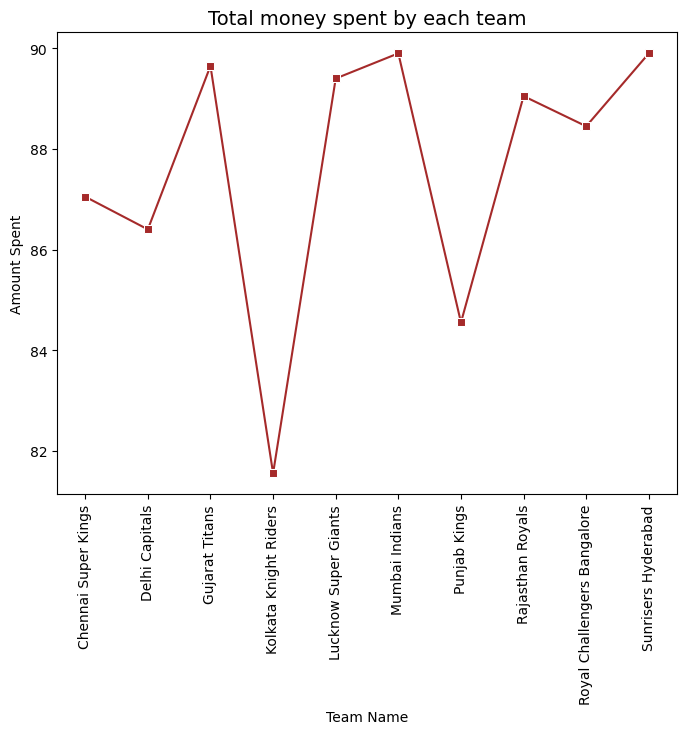

In [112]:
plt.figure(figsize=(8,6))
sns.lineplot(money_spent, color='brown', marker='s')
plt.xlabel("Team Name")
plt.ylabel("Amount Spent")
plt.xticks(rotation=90)
plt.title("Total money spent by each team", fontsize=14, fontweight='light')
plt.plot();